In [ ]:
#Qhaisara and Erin

In [1]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
df = pd.read_csv("liver_disease.csv")

In [3]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 2})
df['Selector'] = df['Selector'].replace({1: 0, 2: 1})

In [5]:
print(df)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  \
0     65       2   0.7  0.1      187    16    18  6.8  3.3       0.90   
1     62       1  10.9  5.5      699    64   100  7.5  3.2       0.74   
2     62       1   7.3  4.1      490    60    68  7.0  3.3       0.89   
3     58       1   1.0  0.4      182    14    20  6.8  3.4       1.00   
4     72       1   3.9  2.0      195    27    59  7.3  2.4       0.40   
..   ...     ...   ...  ...      ...   ...   ...  ...  ...        ...   
578   60       1   0.5  0.1      500    20    34  5.9  1.6       0.37   
579   40       1   0.6  0.1       98    35    31  6.0  3.2       1.10   
580   52       1   0.8  0.2      245    48    49  6.4  3.2       1.00   
581   31       1   1.3  0.5      184    29    32  6.8  3.4       1.00   
582   38       1   1.0  0.3      216    21    24  7.3  4.4       1.50   

     Selector  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
578        

In [6]:
df.Selector.unique()

array([0, 1])

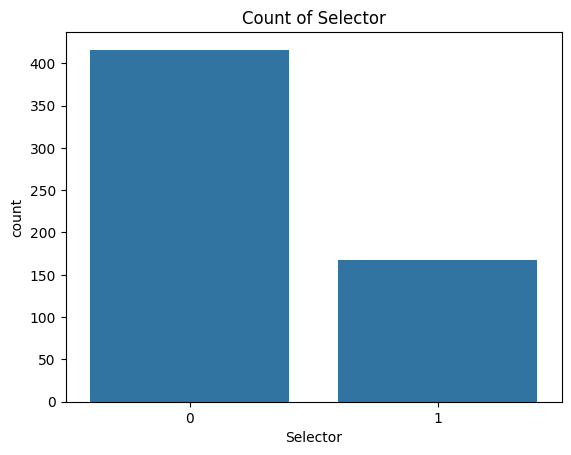

In [7]:
import seaborn as sns
sns.countplot(data=df, x='Selector')
plt.title('Count of Selector')
plt.show()

In [8]:
print(df.groupby('Selector').size())

Selector
0    416
1    167
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'Selector'], df['Selector'],
stratify=df['Selector'], random_state=66)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    int64  
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [11]:
features = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']

X = df[features] #input
y = df['Selector'] #target

print(X)
print(y)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio
0     65       2   0.7  0.1      187    16    18  6.8  3.3       0.90
1     62       1  10.9  5.5      699    64   100  7.5  3.2       0.74
2     62       1   7.3  4.1      490    60    68  7.0  3.3       0.89
3     58       1   1.0  0.4      182    14    20  6.8  3.4       1.00
4     72       1   3.9  2.0      195    27    59  7.3  2.4       0.40
..   ...     ...   ...  ...      ...   ...   ...  ...  ...        ...
578   60       1   0.5  0.1      500    20    34  5.9  1.6       0.37
579   40       1   0.6  0.1       98    35    31  6.0  3.2       1.10
580   52       1   0.8  0.2      245    48    49  6.4  3.2       1.00
581   31       1   1.3  0.5      184    29    32  6.8  3.4       1.00
582   38       1   1.0  0.3      216    21    24  7.3  4.4       1.50

[583 rows x 10 columns]
0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Selector, Length: 583, dtype: 

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.712


In [13]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.716
Accuracy on test set: 0.712


In [14]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.         0.         0.         0.60877684 0.33644875 0.05477441
 0.         0.         0.         0.        ]


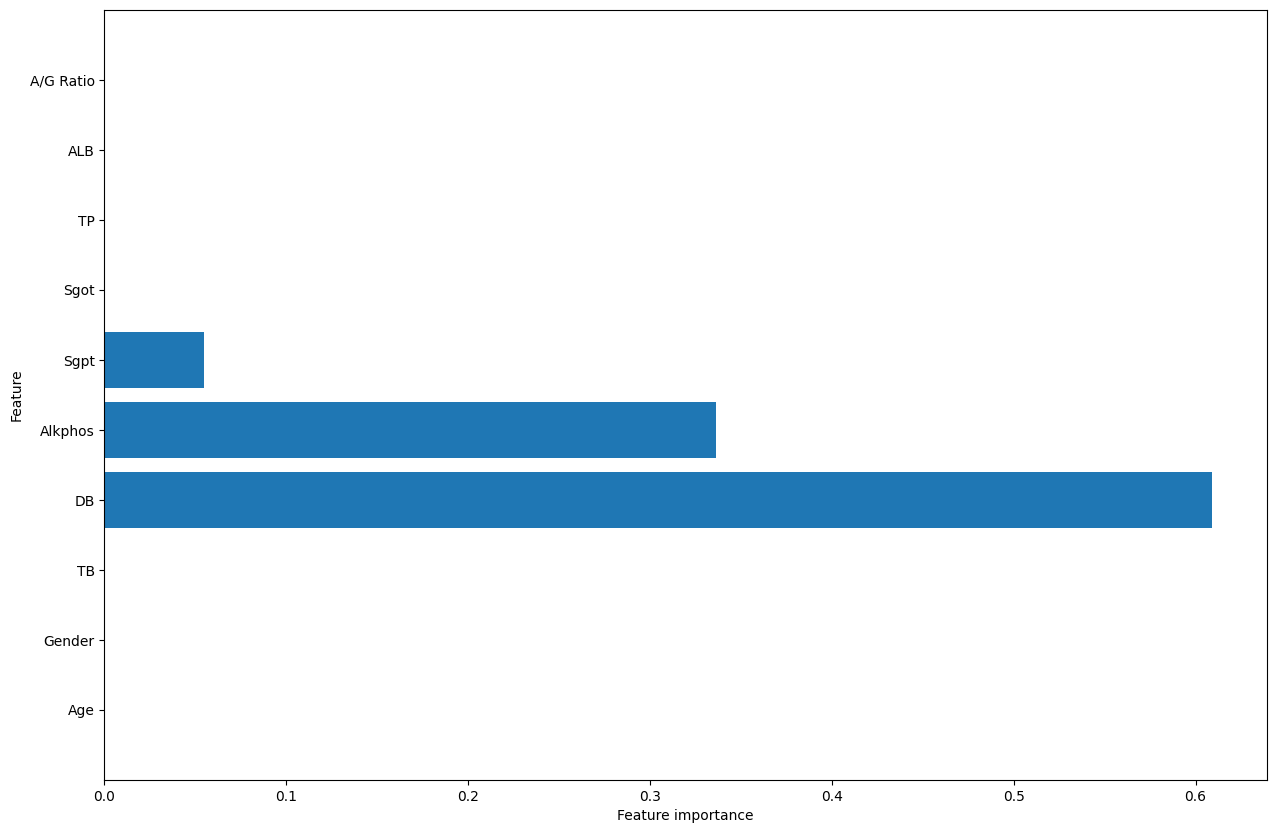

In [15]:
def plot_feature_importances_liverDisease(model):
    plt.figure(figsize=(15,10))
    n_features = 10  #total number of input features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_liverDisease(tree)

In [16]:
important_features = ['Sgpt', 'Alkphos', 'DB']

f = df[important_features] #input
t = df['Selector'] #target

print(f)
print(t)

     Sgpt  Alkphos   DB
0      16      187  0.1
1      64      699  5.5
2      60      490  4.1
3      14      182  0.4
4      27      195  2.0
..    ...      ...  ...
578    20      500  0.1
579    35       98  0.1
580    48      245  0.2
581    29      184  0.5
582    21      216  0.3

[583 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Selector, Length: 583, dtype: int64


In [17]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree2.png')


True

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

tree_rules = export_text(clf_dt, feature_names=important_features)
print(tree_rules)

|--- DB <= 0.85
|   |--- Alkphos <= 211.50
|   |   |--- Sgpt <= 19.50
|   |   |   |--- class: 1
|   |   |--- Sgpt >  19.50
|   |   |   |--- class: 0
|   |--- Alkphos >  211.50
|   |   |--- Sgpt <= 32.50
|   |   |   |--- class: 0
|   |   |--- Sgpt >  32.50
|   |   |   |--- class: 0
|--- DB >  0.85
|   |--- Sgpt <= 12.00
|   |   |--- class: 1
|   |--- Sgpt >  12.00
|   |   |--- DB <= 1.25
|   |   |   |--- class: 0
|   |   |--- DB >  1.25
|   |   |   |--- class: 0

